# Sales price estimation : Pre-Steps

The dataset describes the sales activity from a marketplace to exchange second-hand products between buyers and sellers. The first columns are describing the characteristics of the products, then 2 columns are measuring the popularity of the products, and the last columns indicate the time online, if the product was sold and the associated sales price. 

Based on this dataset, our objective is to estimate a sales price given the product attributes. This estimated sales price should be both attractive for buyers and sellers, in order to **maximise the number of transactions in the marketplace**, but also to **fullfill the best customer satisfaction**.

## Collect data and first analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Collect data
data_3 = pd.read_csv(r"data\pricing_data.csv")
# Delete duplicates
data_3 = data_3.drop_duplicates()
# Display dataframe
data_3

,category,sub_category,brand,model,material,color,quality,flag,pop1,pop2,time_online,sold,price
0,2.0,21.0,63.0,NaN,8.0,4.0,2.0,1,6,64,10,1,2434.14
1,2.0,9.0,377.0,NaN,66.0,15.0,2.0,0,0,28,7,1,1833.54
2,2.0,21.0,499.0,NaN,66.0,15.0,2.0,0,2,42,5,1,2581.95
3,2.0,45.0,499.0,NaN,25.0,21.0,2.0,0,5,19,429,0,2048.04
4,2.0,42.0,541.0,NaN,8.0,24.0,2.0,0,5,55,96,1,789.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73283,3.0,34.0,123.0,NaN,11.0,4.0,2.0,0,3,36,1,1,1290.14
73287,2.0,26.0,465.0,NaN,66.0,9.0,2.0,0,8,89,4,1,1433.14
73289,4.0,0.0,852.0,NaN,24.0,6.0,0.0,0,4,27,9,1,2505.64
73291,4.0,0.0,905.0,NaN,24.0,3.0,1.0,0,4,31,727,0,2863.14


>The dataset contains the main product attributes (in numerical format), and the 3 last columns are information related to the pricing (the product price, the time in the website, and the indicator to know if it has been sold during this time period).

>**A big amount of duplicates have to be deleted**(15 456 duplicates over 73 295 lines in the original dataset => 57 839 remaining lines). Also, the attribute **"model" is very unbalanced** (a lot of NaN values).

In [2]:
print("Percentage of NaN values for the model :", round(data_3["model"].isna().sum()/data_3.shape[0]*100,2),"%")
print("\nNumber of modalities for each variable :")
print(data_3.nunique())
print("\nDataset description :")
data_3.describe()

Percentage of NaN values for the model : 94.91 %

Number of modalities for each variable :
category            5
sub_category       59
brand            1100
model             217
material           69
color              26
quality             3
flag                2
pop1              123
pop2              595
time_online       729
sold                2
price           12151
dtype: int64

Dataset description :


,category,sub_category,brand,model,material,color,quality,flag,pop1,pop2,time_online,sold,price
count,57839.000000,57839.000000,57839.000000,2944.000000,57836.000000,57827.000000,57839.000000,57839.000000,57839.000000,57839.000000,57839.000000,57839.000000,57839.000000
mean,2.290755,26.692854,570.416121,92.742527,33.779722,10.066803,1.759055,0.034959,7.214890,67.545238,254.120386,0.628780,2406.000404
std,1.114719,17.193272,303.459528,59.704012,20.249647,7.469799,0.466266,0.183678,8.699106,67.033519,245.403834,0.483135,2925.884125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,225.210000
25%,2.000000,11.000000,315.000000,38.000000,20.000000,3.000000,2.000000,0.000000,2.000000,28.000000,18.000000,0.000000,1075.640000
50%,2.000000,21.000000,541.000000,81.000000,28.000000,8.000000,2.000000,0.000000,5.000000,48.000000,155.000000,1.000000,1719.140000
75%,3.000000,44.000000,852.000000,149.000000,55.000000,16.000000,2.000000,0.000000,9.000000,83.000000,478.000000,1.000000,2807.560000
max,4.000000,58.000000,1099.000000,216.000000,68.000000,25.000000,2.000000,1.000000,212.000000,1374.000000,728.000000,1.000000,243103.140000


>The ***first 8 columns are in numerical format but are related to categorical variables***. Some of these categorical variables  contain more than 50 distinct values (like the Brand, the Sub_category, the Model, or the Material).

>Even if we select the main characteristics (category / brand / material / color / quality), we have ***a lot of possible combinations in the dataset for the main product attributes*** :
>- 5 x 1100 x 69 x 26 x 3 = **29 601 000** combinations

>With a dataset that only contains around **50 000** entries, it should be ***hard to predict a very accurate price*** taking into account so many possible combinations of features.

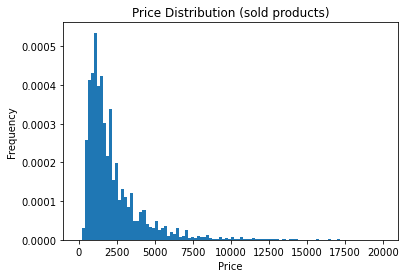

In [3]:
# Visualize the target price distribution (for sold products)
plt.hist(data_3[data_3["sold"]==1]["price"], range=(0,20000), bins = 100, density = True)
plt.title('Price Distribution (sold products)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

>The distribution of ***prices for sold products is spread out from 225€ to 130 540€*** (very large interval) but ***most of them are between 1004€ (Q1) and 2720€ (Q3)***. The mean price is 2487€ and the median price 1613€, and the standard deviation is huge as we can imagine (2298€).

## Analyse the distribution of the time to sell

In [17]:
data_3a = data_3[data_3["sold"]==1]
print("Dataset size :",data_3a.shape)

Dataset size : (36368, 13)


Before to visualize the "time to sell" distribution, we ***filter the dataset on sold products*** (36 368 remaining entries).

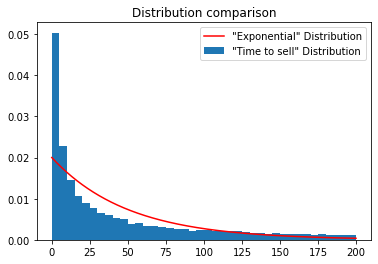

In [64]:
from scipy.stats import chi2

plt.hist(data_3a["time_online"], range=(0,200), bins = 40, density = True)
lda = 0.02
d = np.arange(0, 200, 0.1)
plt.plot(d, lda*np.exp(-lda*d), color = 'red')
plt.legend(['"Exponential" Distribution', '"Time to sell" Distribution'])
plt.title('Distribution comparison')
plt.show()

>We can approximate this distribution with an **"Exponential" distribution** ("lambda" paramter around 0.02). As a consequence,we have a few interesting properties :
>- E(X) = 1 / 0.02 = 50 => ***50 days is the expectation time to sell a product***
>- X_Median = E(X) x ln(2) => ***35 days is the median time to sell a product***

The "Exponential" distribution is expected to modelize the lifespan of a **"memoryless phenomenon"** : it means that the probability to sell a product after 10 days, 30 days , 100 days is the same (no time degradation). It could be a good model ***except for the new products [0 to 7 days] for which we expect a better selling probability because of the "newness" effect.***

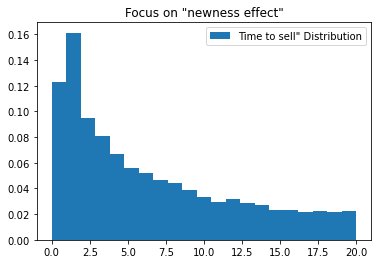

In [66]:
plt.hist(data_3a["time_online"], range=(0,20), bins = 21, density = True)
d = np.arange(0, 20, 0.1)
plt.legend(['Time to sell" Distribution'])
plt.title('Focus on "newness effect"')
plt.show()

If we focus on the beginning of the graph (**"newness" effect**), we can see that the distribution is a bit different :
- we note a special effect for the "Day 0", probably because some buyers need at least 1 day to finalize the transaction.
But this "side effect" is not very interesting for our business case => **Define attractive prices for buyers and sellers.**

=> **We should avoid to focus on this particular "newness period" for our business case** because some buyers could finalize quickly the transactions not because the prices were interesting, but because of the **offer rarity** for example.